In [1]:
"""
Calculate electric field strength at a distance

23-Nov-22   CBL Original
24-Nov-22   CBL error in FS calculation
"""
import numpy as np
import matplotlib.pyplot as plt
import math

In [13]:
def dB2FS(Source, Distance):
    """
    @Source - dBm power at source
    @Distance - vector of distances

    Convert from dB to W
    dB in milliwatts, converts to volts
    dB = 10*log10(Pin/0.001) inverting Pin = 10^(dB/10)*0.001
    """
    Watts = np.power(10.0, Source/10.0) * ReferencePower
    
    """ Propigate this, thinking of it as the Poynting vector"""
    TestPoint       = Watts * np.power(Distance, -2.0)
    """
    P=E^2/R, E = sqrt(P*R)
    Use 377 ohms as free space impedance
    """
    ReferenceImpedance = 377.0 # Ohms
    Voltage = np.sqrt(TestPoint * ReferenceImpedance)
    """ 
    24-Nov-22 Divide by the distance it has to be dV/ds, was V/s
    """
    dV = np.diff(Voltage)
    ds = np.diff(Distance)
    FS = np.abs(dV/ds) # the differences are negative, but don't care
    return FS

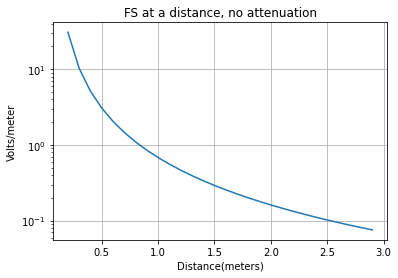

In [14]:
""" 
Energy at source is declared as 0dBm
consider this an isotropic source
"""
""" Distance to test point"""
Distance = np.arange(0.1, 3.0, 0.1)
"""
Power should go down as 1/r^2
"""
Source          = 0     # dBm
ReferencePower  = 0.001 # Watts
""" Propigate this, thinking of it as the Poynting vector"""
FS = dB2FS(Source, Distance)
plt.semilogy(Distance[1:],FS)
plt.title("FS at a distance, no attenuation")
plt.xlabel("Distance(meters)")
plt.ylabel("Volts/meter")
plt.grid(True)

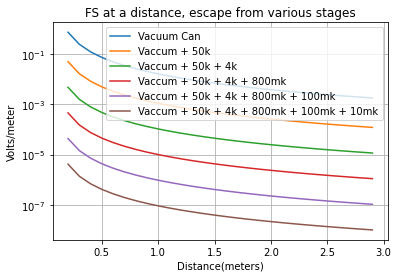

In [15]:
"""
Look at what each of the thermal shields should do. 
1 The vacuum can is about 0.5" thick
2 The 50k   shield is about 0.060" thick and aluminum
3 The 4k    shield is 0.030" thick and gold plated aluminum
4 The 800mk shield is 0.030" thick and gold plated aluminum
5 The 100mk shield is 0.030" thick and gold plated aluminum
6 The 10mk  shield is 0.030" thick and gold plated aluminum
Reference information: https://www.rfcafe.com/references/electrical/cond-high-freq.htm
"""
AlSkinDepth_1  = 2.59e-6   # meters at 1GHz
AlSkinDepth_10 = 0.819e-6  # meters at 10GHz
SkinDepth = AlSkinDepth_1
# inches * meters/inch over SkinDepth
Att1 =   0.5 * 0.0254/SkinDepth    # how many skin depths do we have for a a 1/2" thickness
Att2 = 0.060 * 0.0254/SkinDepth
Att3 = 0.030 * 0.0254/SkinDepth
"""
This skin depth is like a 1/e point and can represent the loss in dB as
"""
Loss1dB = -10.0 * np.log10(Att1/np.exp(1))
Loss2dB = -10.0 * np.log10(Att2/np.exp(1))
Loss3dB = -10.0 * np.log10(Att3/np.exp(1))
"""
Make the curves of the power, 6 curves
"""
Loss1 = Source + Loss1dB
Loss2 = Loss1 + Loss2dB
Loss3 = Loss2 + Loss3dB
Loss4 = Loss3 + Loss3dB
Loss5 = Loss4 + Loss3dB
Loss6 = Loss5 + Loss3dB

"""
Make the various curves based on the loss inside the can without any respect for 
the attenuation in the signal that we introduce. 
"""
Curve1 = dB2FS(Loss1, Distance)
Curve2 = dB2FS(Loss2, Distance)
Curve3 = dB2FS(Loss3, Distance)
Curve4 = dB2FS(Loss4, Distance)
Curve5 = dB2FS(Loss5, Distance)
Curve6 = dB2FS(Loss6, Distance)
#
r = Distance[1:]
l1, = plt.semilogy(r, Curve1) 
l1.set_label("Vacuum Can")
l2, = plt.semilogy(r, Curve2) 
l2.set_label("Vaccum + 50k")
l3, = plt.semilogy(r, Curve3)
l3.set_label("Vaccum + 50k + 4k")
l4, = plt.semilogy(r, Curve4)
l4.set_label("Vaccum + 50k + 4k + 800mk")
l5, = plt.semilogy(r, Curve5)
l5.set_label("Vaccum + 50k + 4k + 800mk + 100mk")
l6, = plt.semilogy(r, Curve6)
l6.set_label("Vaccum + 50k + 4k + 800mk + 100mk + 10mk")
plt.title("FS at a distance, escape from various stages")
plt.xlabel("Distance(meters)")
plt.ylabel("Volts/meter")
plt.grid(True)
plt.legend()